In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Helper functions

In [183]:
def plot_micro_macro(res, param='F1-score', hyper_param='Learning Rate'):
    if param == 'Precision':
        x = 0
    elif param == 'Recall':
        x = 1
    elif param == 'F1-score':
        x = 2
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey='row')
    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[1, 0]
    ax4 = axes[1, 1]
    ax5 = axes[2, 0]
    ax6 = axes[2, 1]

    for j in range(len(res)):
        ax1.plot(np.arange(1, 6), res[j]['training'].values[x], label=str(batch[j]))
        ax2.plot(np.arange(1, 6), res[j]['validating'].values[x], label=str(batch[j]))
        ax3.plot(np.arange(1, 6), res[j]['training'].values[x + 3], label=str(batch[j]))
        ax4.plot(np.arange(1, 6), res[j]['validating'].values[x + 3], label=str(batch[j]))
        ax5.plot(np.arange(1, 6), res[j]['training'].values[x + 6], label=str(batch[j]))
        ax6.plot(np.arange(1, 6), res[j]['validating'].values[x + 6], label=str(batch[j]))

    ax1.set_title('Training')
    ax1.set_ylabel('Micro')
    ax2.set_title('Validation')
    ax3.set_ylabel('Macro')
    ax5.set_ylabel('Sample')
    ax5.set_xlabel('Epoch')
    ax6.set_xlabel('Epoch')

    #display plot
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.9))
    plt.style.use('ggplot')
    plt.suptitle(f'{param} Evolution per {hyper_param}')
    fig.tight_layout()
    plt.show()

def plot_loss(res,param='Total loss',hyper_param='Learning Rate'):
    if param == 'Total loss':
        x = 10
    elif param == 'Hamming loss':
        x = 9

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5), sharey=True)
    ax1 = axes[0]
    ax2 = axes[1]
    for j in range(len(res)):
        ax1.plot(np.arange(1,6),res[j]['training'].values[x], label=str(batch[j]))
        ax2.plot(np.arange(1,6),res[j]['validating'].values[x], label=str(batch[j]))

    ax1.set_title('Training')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel(param)
    ax1.legend()
    ax2.set_title('Validation')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    #display plot
    plt.style.use('ggplot')
    plt.suptitle(f'{param} Evolution per {hyper_param}')
    fig.tight_layout()
    plt.show()

def getColor(c, N, idx):
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap(c)
    norm = mpl.colors.Normalize(vmin=0.0, vmax=N - 1)
    return cmap(norm(idx))

# Planet : Amazon space -- Post-Processing pipeline

## Batch Size Testing
### Data import

In [179]:
data_folder = '../ipeo-amazon/BatchSizeTesting'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [180]:
res16 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_16batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res24 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_24batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res36 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_36batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res48 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_48batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res64 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_64batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res = [res16,res24,res36,res48,res64]
batch = [16,24,36,48,64]

In [17]:
res16.index

Index(['micro/precision', 'micro/recall', 'micro/f1', 'macro/precision',
       'macro/recall', 'macro/f1', 'samples/precision', 'samples/recall',
       'samples/f1', 'hamming_loss', 'total_loss', 'report'],
      dtype='object')

In [184]:
res48.head()

,training,validating
micro/precision,"[0.846420987889903, 0.8500998822440321, 0.8547...","[0.839503153086234, 0.8670362487930041, 0.8759..."
micro/recall,"[0.6027786065488541, 0.653381789337455, 0.6710...","[0.666575796662717, 0.6581531471653841, 0.6599..."
micro/f1,"[0.701230748744567, 0.7375903905757161, 0.7508...","[0.742388411817352, 0.747239578810564, 0.75214..."
macro/precision,"[0.21563718756612102, 0.283851205999338, 0.307...","[0.260660695463919, 0.300708682113813, 0.29005..."
macro/recall,"[0.170307448285574, 0.21473620923618203, 0.234...","[0.203726389623855, 0.238037299526756, 0.22703..."


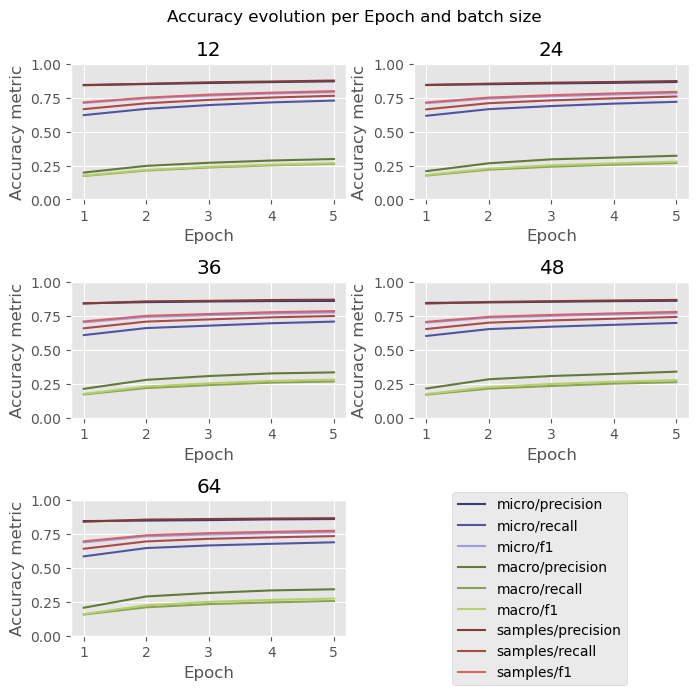

In [102]:
col = [0,1,3,4,5,6,12,13,14]
#create precision recall curve

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]

ax = [ax1,ax2,ax3,ax4,ax5]

for j in range(len(ax)):
    x = ax[j]
    for i in range(9):
        x.plot(np.arange(1,6),res[j]['training'].values[i], label=res[j].index[i], color=getColor('tab20b', 20,col[i]))
    #add axis labels to plot
    x.set_title(str(batch[j]))
    x.set_ylabel('Accuracy metric')
    x.set_xlabel('Epoch')
    x.set_ylim(0,1)

axes[2, 1].remove()  # don't display empty ax
handles, labels = ax5.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.3))
#display plot
plt.style.use('ggplot')
plt.suptitle('Accuracy evolution per Epoch and batch size')
fig.tight_layout()
plt.show()

### Precision

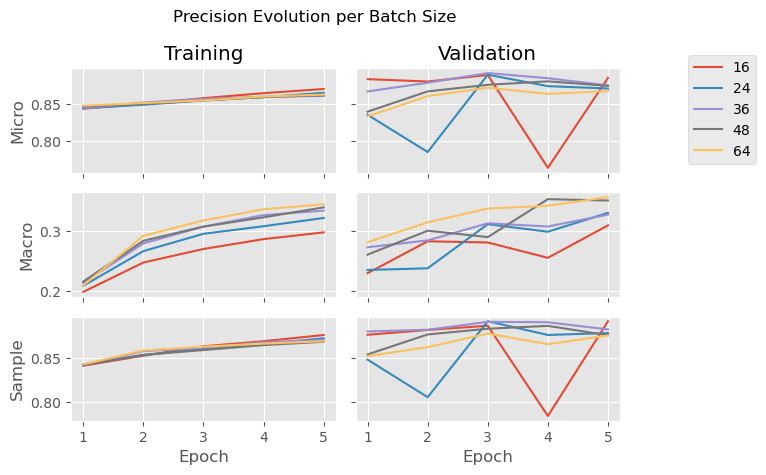

In [181]:
plot_micro_macro(res,'Precision','Batch Size')

### Total Loss

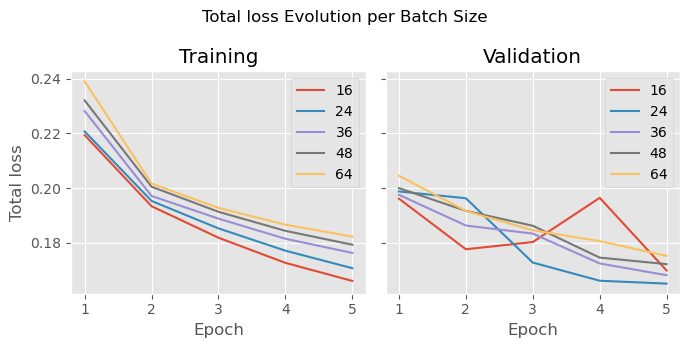

In [182]:
plot_loss(res,'Total loss','Batch Size')

## Learning rate Testing
### Data import

In [157]:
data_folder = '../ipeo-amazon/LearningRateTesting'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [163]:
res1 = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_1lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-12.json')
res01 = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-12.json')
res001 = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_001lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-12.json')
res = [res1,res01,res001]
batch = [0.1,0.01,0.001]

In [161]:
res1

,training,validating
micro/precision,"[0.841810904916897, 0.851842925358077, 0.85776...","[0.8503549132965971, 0.8410338366906781, 0.891..."
micro/recall,"[0.6238961796025211, 0.6735680829074221, 0.695...","[0.6573384958010581, 0.706516380243418, 0.6715..."
micro/f1,"[0.7139710558174001, 0.7507357101859571, 0.766...","[0.740634946206382, 0.7670817937387201, 0.7654..."
macro/precision,"[0.22825032536363302, 0.300773538231423, 0.324...","[0.24873736300957403, 0.29765354058159005, 0.3..."
macro/recall,"[0.18354282295818802, 0.23631937497987002, 0.2...","[0.18433798575568702, 0.23759870198014002, 0.2..."
macro/f1,"[0.18844369256478802, 0.24812867114206902, 0.2...","[0.19634593728245703, 0.249305358832755, 0.250..."
samples/precision,"[0.8416937905506121, 0.8579294678057791, 0.864...","[0.853481267943151, 0.8426439011080261, 0.8843..."
samples/recall,"[0.668580243608354, 0.718552330977368, 0.73804...","[0.6867176192848841, 0.7312946354426171, 0.722..."
samples/f1,"[0.7178634777824151, 0.7590998396720531, 0.775...","[0.7378282149395751, 0.7639702461077641, 0.775..."
hamming_loss,"[0.08398496830016301, 0.07489637534174001, 0.0...","[0.07737624197661101, 0.072151880184061, 0.069..."


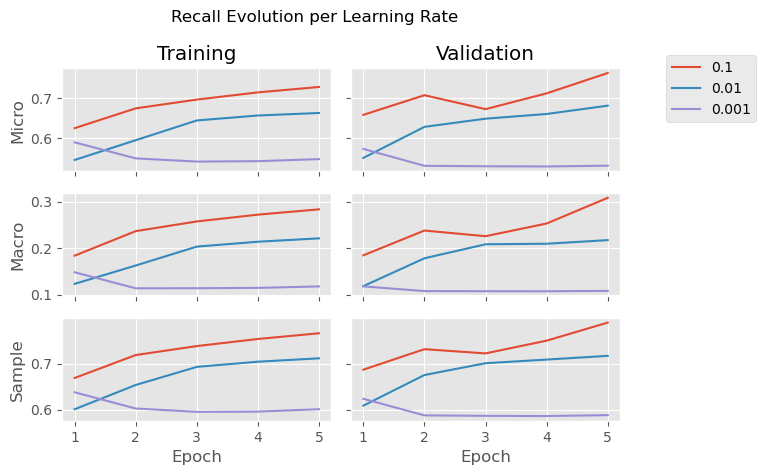

In [173]:
plot_micro_macro(res,param='Recall')

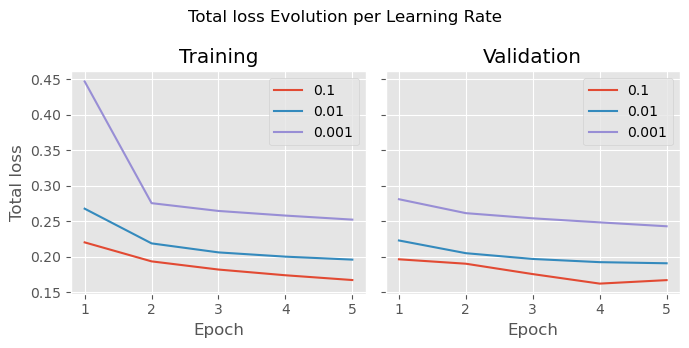

In [177]:
plot_loss(res)

## Transform Testing
### Data import

In [185]:
data_folder = '../ipeo-amazon/TransformsTesting'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [186]:
reswith = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_WithTransforms_2023-01-12.json')
reswithout = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_NoTransforms_2023-01-12.json')
res = [reswith, reswithout]
batch = [1,0]

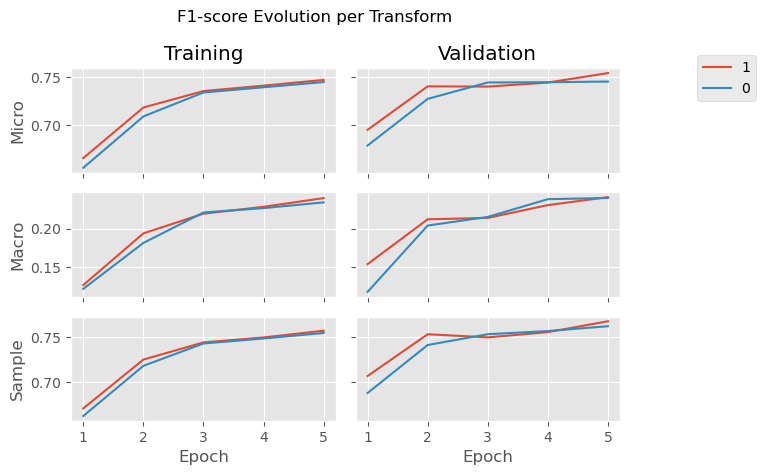

In [187]:
plot_micro_macro(res,param='F1-score',hyper_param='Transform')

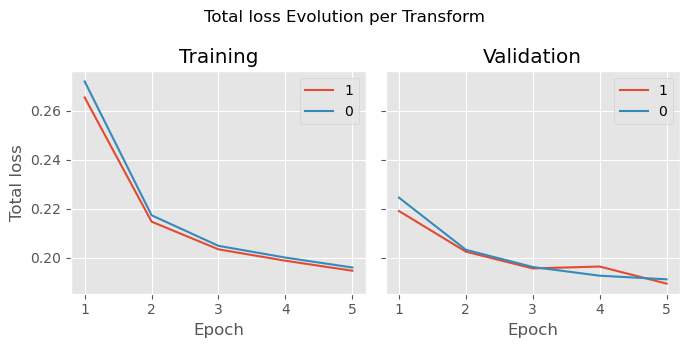

In [189]:
plot_loss(res,hyper_param='Transform')